# Lab1 - Arytmetyka komputerowa

### Zadanie 1
Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

In [1]:
# x = sign * mantissa * 2^exponent

decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

In [2]:
decode(Float16(1/3))

('0', "01101", "0101010101")

In [3]:
decode(Float32(1/3))

('0', "01111101", "01010101010101010101011")

In [4]:
decode(Float64(1/3))

('0', "01111111101", "0101010101010101010101010101010101010101010101010101")

In [5]:
# same as: decode(Float64(Float16(1/3)))
decode(convert(Float64, Float16(1/3)))

('0', "01111111101", "0101010101000000000000000000000000000000000000000000")

### Zadanie 2
Zbadać, jak zmienia się odległość między kolejnymi liczbami zmiennoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

In [6]:
# machine epsilon - distance between two adjacent representable floating-point numbers
# eps(Float64) is same as eps() - gives distance between 1.0 and next larger representable floating-point value
# eps(x) - gives absolute difference between x value and the next representable floating point value

println(eps())
println(eps(1.0))
println(eps(14.6))

2.220446049250313e-16
2.220446049250313e-16
1.7763568394002505e-15


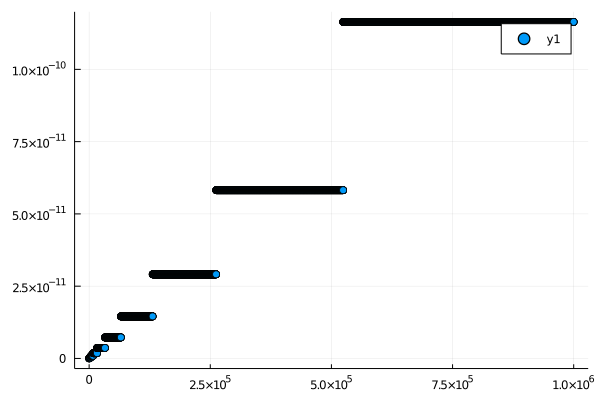

In [7]:
using Plots
x = 1.0:100.0:1000000.0;
y = eps.(x);  # elementwise eps(x)

scatter(x,y)
# plot(x,y)

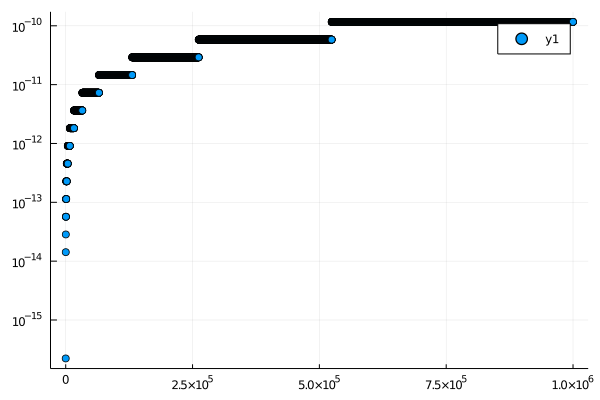

In [8]:
# same plot using logarithmic scale

x = 1.0:100.0:1000000.0;
y = eps.(x);  # elementwise eps(x)

scatter(x,y,yaxis=:log)

### Zadanie 3
Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

##### Read only code
```c
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main (void) {
    float x = 10.0;
    int precision = 50;
    int idx = 0;
    while(x != 0.0) {
        printf("%d\n", idx);
        printf("C float type: %.*f\n", precision, x);
        printf("IEEE754 repr:");
        gsl_ieee_printf_float(&x);
        printf("\n\n");
        x /= 5.0;
        idx++;
    }

    return 0;
}
```

##### Output
```c
0
C float type: 10.00000000000000000000000000000000000000000000000000
IEEE754 repr: 1.01000000000000000000000*2^3

1
C float type: 2.00000000000000000000000000000000000000000000000000
IEEE754 repr: 1.00000000000000000000000*2^1

2
C float type: 0.40000000596046447753906250000000000000000000000000
IEEE754 repr: 1.10011001100110011001101*2^-2

3
C float type: 0.07999999821186065673828125000000000000000000000000
IEEE754 repr: 1.01000111101011100001010*2^-4

4
C float type: 0.01599999889731407165527343750000000000000000000000
IEEE754 repr: 1.00000110001001001101110*2^-6

5
C float type: 0.00319999968633055686950683593750000000000000000000
IEEE754 repr: 1.10100011011011100010110*2^-9

6
C float type: 0.00063999992562457919120788574218750000000000000000
IEEE754 repr: 1.01001111100010110101011*2^-11

7
C float type: 0.00012799998512491583824157714843750000000000000000
IEEE754 repr: 1.00001100011011110111100*2^-13

8
C float type: 0.00002559999666118528693914413452148437500000000000
IEEE754 repr: 1.10101101011111110010011*2^-16

9
C float type: 0.00000511999951413599774241447448730468750000000000
IEEE754 repr: 1.01010111100110001110110*2^-18

10
C float type: 0.00000102399985735246445983648300170898437500000000
IEEE754 repr: 1.00010010111000001011110*2^-20

11
C float type: 0.00000020479997431266383500769734382629394531250000
IEEE754 repr: 1.10110111110011011111101*2^-23

12
C float type: 0.00000004095999628361823852173984050750732421875000
IEEE754 repr: 1.01011111110101111111110*2^-25

13
C float type: 0.00000000819199907908796376432292163372039794921875
IEEE754 repr: 1.00011001011110011001011*2^-27

14
C float type: 0.00000000163839986022651373787084594368934631347656
IEEE754 repr: 1.11000010010111000010010*2^-30

15
C float type: 0.00000000032767996649418762444838648661971092224121
IEEE754 repr: 1.01101000010010011011011*2^-32

16
C float type: 0.00000000006553599329883752488967729732394218444824
IEEE754 repr: 1.00100000001110101111100*2^-34

17
C float type: 0.00000000001310719848629515738025475002359598875046
IEEE754 repr: 1.11001101001010110010011*2^-37

18
C float type: 0.00000000000262143974062711837547112736501730978489
IEEE754 repr: 1.01110000111011110101001*2^-39

19
C float type: 0.00000000000052428796980946712480431415315251797438
IEEE754 repr: 1.00100111001001011101110*2^-41

20
C float type: 0.00000000000010485759667239885617462391564913559705
IEEE754 repr: 1.11011000001111001001010*2^-44

21
C float type: 0.00000000000002097151933447977123492478312982711941
IEEE754 repr: 1.01111001110010100001000*2^-46

22
C float type: 0.00000000000000419430386689595424698495662596542388
IEEE754 repr: 1.00101110001110110100000*2^-48

23
C float type: 0.00000000000000083886077337919084939699132519308478
IEEE754 repr: 1.11100011100100100000000*2^-51

24
C float type: 0.00000000000000016777215996979409021877538421563258
IEEE754 repr: 1.10000010110110110011010*2^-53

25
C float type: 0.00000000000000003355443265570330808617721674025347
IEEE754 repr: 1.00110101011111000010101*2^-55

26
C float type: 0.00000000000000000671088653114066161723544334805069
IEEE754 repr: 1.11101111001011010001000*2^-58

27
C float type: 0.00000000000000000134217726486910169579570492603970
IEEE754 repr: 1.10001100001001000000110*2^-60

28
C float type: 0.00000000000000000026843546331357799607198692110055
IEEE754 repr: 1.00111100111010011010010*2^-62

29
C float type: 0.00000000000000000005368709137024589210029164223353
IEEE754 repr: 1.11111011000011110110110*2^-65

30
C float type: 0.00000000000000000001073741827404917842005832844671
IEEE754 repr: 1.10010101101001011111000*2^-67

31
C float type: 0.00000000000000000000214748365480983568401166568934
IEEE754 repr: 1.01000100100001001100000*2^-69

32
C float type: 0.00000000000000000000042949672086454754997338202860
IEEE754 repr: 1.00000011100111010110011*2^-71

33
C float type: 0.00000000000000000000008589934164855461328743862840
IEEE754 repr: 1.10011111011000100011110*2^-74

34
C float type: 0.00000000000000000000001717986801416656056908300352
IEEE754 repr: 1.01001100010011101001011*2^-76

35
C float type: 0.00000000000000000000000343597360283331211381660070
IEEE754 repr: 1.00001001110110000111100*2^-78

36
C float type: 0.00000000000000000000000068719473042742373802596771
IEEE754 repr: 1.10101001010110100101101*2^-81

37
C float type: 0.00000000000000000000000013743894608548474760519354
IEEE754 repr: 1.01010100010010000100100*2^-83

38
C float type: 0.00000000000000000000000002748779044969211392886965
IEEE754 repr: 1.00010000001110011101010*2^-85

39
C float type: 0.00000000000000000000000000549755816697562056126336
IEEE754 repr: 1.10110011100011111011101*2^-88

40
C float type: 0.00000000000000000000000000109951167191372299999739
IEEE754 repr: 1.01011100011100101111110*2^-90

41
C float type: 0.00000000000000000000000000021990234401239432193566
IEEE754 repr: 1.00010110110000100110010*2^-92

42
C float type: 0.00000000000000000000000000004398047000618507962915
IEEE754 repr: 1.10111110000000111101010*2^-95

43
C float type: 0.00000000000000000000000000000879609370031046211533
IEEE754 repr: 1.01100100110011111101110*2^-97

44
C float type: 0.00000000000000000000000000000175921870244627319675
IEEE754 repr: 1.00011101011100110001011*2^-99

45
C float type: 0.00000000000000000000000000000035184374989320944593
IEEE754 repr: 1.11001000101110000010010*2^-102

46
C float type: 0.00000000000000000000000000000007036874762765318754
IEEE754 repr: 1.01101101011000000001110*2^-104

47
C float type: 0.00000000000000000000000000000001407375011327781292
IEEE754 repr: 1.00100100010011001110010*2^-106

48
C float type: 0.00000000000000000000000000000000281475005938976105
IEEE754 repr: 1.11010011101011100011101*2^-109

49
C float type: 0.00000000000000000000000000000000056295003024505144
IEEE754 repr: 1.01110110001001001111110*2^-111

50
C float type: 0.00000000000000000000000000000000011259000834489769
IEEE754 repr: 1.00101011010100001100101*2^-113

51
C float type: 0.00000000000000000000000000000000002251800195596546
IEEE754 repr: 1.11011110111001111010101*2^-116

52
C float type: 0.00000000000000000000000000000000000450360053468606
IEEE754 repr: 1.01111111000111111011110*2^-118

53
C float type: 0.00000000000000000000000000000000000090072012487383
IEEE754 repr: 1.00110010011111111100101*2^-120

54
C float type: 0.00000000000000000000000000000000000018014402497477
IEEE754 repr: 1.11101010011001100001000*2^-123

55
C float type: 0.00000000000000000000000000000000000003602880443443
IEEE754 repr: 1.10001000010100011010011*2^-125

56
C float type: 0.00000000000000000000000000000000000000720576116715
IEEE754 repr: 0.10011100111011010111011*2^-126

57
C float type: 0.00000000000000000000000000000000000000144115279395
IEEE754 repr: 0.00011111011000101011001*2^-126

58
C float type: 0.00000000000000000000000000000000000000028823027853
IEEE754 repr: 0.00000110010001101111000*2^-126

59
C float type: 0.00000000000000000000000000000000000000005764661623
IEEE754 repr: 0.00000001010000010110010*2^-126

60
C float type: 0.00000000000000000000000000000000000000001152988376
IEEE754 repr: 0.00000000010000000100100*2^-126

61
C float type: 0.00000000000000000000000000000000000000000230653727
IEEE754 repr: 0.00000000000011001101110*2^-126

62
C float type: 0.00000000000000000000000000000000000000000046102719
IEEE754 repr: 0.00000000000000101001001*2^-126

63
C float type: 0.00000000000000000000000000000000000000000009248570
IEEE754 repr: 0.00000000000000001000010*2^-126

64
C float type: 0.00000000000000000000000000000000000000000001821688
IEEE754 repr: 0.00000000000000000001101*2^-126

65
C float type: 0.00000000000000000000000000000000000000000000420390
IEEE754 repr: 0.00000000000000000000011*2^-126

66
C float type: 0.00000000000000000000000000000000000000000000140130
IEEE754 repr: 0.00000000000000000000001*2^-126
```

##### Denormalized floating point numbers
In a normal number $1$ is the leading binary digit of mantissa.
A floating-point number may be recognized as denormal whenever its exponent is the least value possible.

When result of operation is not exactly zero but too small to be represented by a normalized number, leading digit is made $0$ - it's called **denormal number**. It is used for reducing loss of precision when occurs an **underflow**.

A denormal number is represented with a biased exponent of all 0 bits, which represents an exponent of $−126$ in single precision.

In above output at $56$th example mantissa is no longer normalized ($\approx 7.2\cdot10^{-39}$).

### Zadanie 4
Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

<i> We can use Pythagorean trigonometric identity: </i> $cos^2(x) + sin^2(x) = 1$


In [11]:
# cos(10^(-8)) = 0.99999999999999995
# because of float representation inaccuracy, result is rounded to 1 

a = 10^(-8)
cos(a)

1.0

We know that

$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$,

so supposedly $f(10^{-8})$ is close to $1$.

$f(x) = g(x)$

##### Unstable


In [12]:
f(x) = (1 - (cos(x))^2)/x^2

f (generic function with 1 method)

In [13]:
f(a)

0.0

It turns out that $f(a) = 0.0$ which is wrong. The reason is the fact that floating-point numbers cannot precisely represent real numbers.

##### Stable

In [14]:
g(x) = (sin(x))^2/x^2

g (generic function with 1 method)

In [15]:
g(a)

1.0

Result is much better. 